<a href="https://colab.research.google.com/github/yashveersinghsohi/Hospital_Mortality_Prediction/blob/master/Hospital_02_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    roc_curve, 
    roc_auc_score
)

# Reading datasets

In [2]:
root_dir_path = "https://raw.githubusercontent.com/yashveersinghsohi/Hospital_Mortality_Prediction/master/Data/"

data_path = root_dir_path + "data.csv"
train_path = root_dir_path + "train.csv"
val_path = root_dir_path + "val.csv"
test_path = root_dir_path + "test.csv"

train_features_path = root_dir_path + "train_features.csv"
train_targets_path = root_dir_path + "train_targets.csv"

val_features_path = root_dir_path + "val_features.csv"
val_targets_path = root_dir_path + "val_targets.csv"

test_features_path = root_dir_path + "test_features.csv"
test_targets_path = root_dir_path + "test_targets.csv"

In [3]:
data = pd.read_csv(data_path)
train = pd.read_csv(train_path)
val = pd.read_csv(val_path)
test = pd.read_csv(test_path)

train_features = pd.read_csv(train_features_path)
train_targets = pd.read_csv(train_targets_path)

val_features = pd.read_csv(val_features_path)
val_targets = pd.read_csv(val_targets_path)

test_features = pd.read_csv(test_features_path)
test_targets = pd.read_csv(test_targets_path)

In [4]:
print("Train features shape - ", train_features.shape)
print("Train Targets shape - ", train_targets.shape, end="\n\n")

print("Val features shape - ", val_features.shape)
print("Val Targets shape - ", val_targets.shape, end="\n\n")

print("Test features shape - ", test_features.shape)
print("Test Targets shape - ", test_targets.shape)

Train features shape -  (952, 116)
Train Targets shape -  (952, 1)

Val features shape -  (106, 116)
Val Targets shape -  (106, 1)

Test features shape -  (118, 116)
Test Targets shape -  (118, 1)


In [5]:
demographic_cols = ["BMI", "age", "gendera", "group"]

vitals_cols = [
  "heart rate", "Systolic blood pressure", "Diastolic blood pressure", 
  "Respiratory rate", "temperature", "SP O2", "Urine output"
]

comorbid_cols = [
  "hypertensive", "atrialfibrillation", "diabetes", 
  "depression", "Hyperlipemia", "CHD with no MI", 
  "Renal failure", "COPD", "deficiencyanemias"         
]

lab_cols = [
  "hematocrit", "RBC", "MCH", "MCHC", "MCV", "RDW", 
  "Leucocyte", "Platelets", "Neutrophils", "Basophils", 
  "Lymphocyte", "PT", "INR", "NT-proBNP", "Creatine kinase", 
  "Creatinine", "Urea nitrogen", "glucose", "Blood potassium", 
  "Blood sodium", "Blood calcium", "Chloride", "Anion gap", 
  "Magnesium ion", "PH", "Bicarbonate", "Lactic acid", "PCO2", "EF"
]

target_cols = ["outcome"]

missing_cols = [
  "BMI_was_missing", 
  "heart rate_was_missing", 
  "Systolic blood pressure_was_missing", 
  "Diastolic blood pressure_was_missing",
  "Respiratory rate_was_missing",
  "temperature_was_missing",
  "SP O2_was_missing",
  "Urine output_was_missing",
  "Neutrophils_was_missing",
  "Basophils_was_missing",
  "Lymphocyte_was_missing",
  "PT_was_missing",
  "INR_was_missing",
  "Creatine kinase_was_missing",
  "glucose_was_missing",
  "Blood calcium_was_missing",
  "PH_was_missing",
  "Lactic acid_was_missing",
  "PCO2_was_missing"
]

In [6]:
demographic_features = ["BMI", "age"]

comorbid_features = [
  "hypertensive", "atrialfibrillation", "diabetes", 
  "depression", "Hyperlipemia",  "Renal failure", 
  "COPD", "deficiencyanemias"         
]

lab_features = [
  "hematocrit", "RBC", "MCH", "MCHC", "MCV", "RDW", 
  "Leucocyte", "Platelets", "Neutrophils", "Basophils", 
  "Lymphocyte", "PT", "INR", "NT-proBNP", "Creatine kinase", 
  "Creatinine", "Urea nitrogen", "glucose", "Blood potassium", 
  "Blood sodium", "Blood calcium", "Chloride", "Anion gap", 
  "Magnesium ion", "PH", "Bicarbonate", "Lactic acid", "PCO2", "EF"
]

missing_features = [
  "BMI_was_missing", 
  "heart rate_was_missing", 
  "Systolic blood pressure_was_missing", 
  "Diastolic blood pressure_was_missing",
  "Respiratory rate_was_missing",
  "temperature_was_missing",
  "SP O2_was_missing",
  "Urine output_was_missing",
  "Neutrophils_was_missing",
  "Basophils_was_missing",
  "Lymphocyte_was_missing",
  "PT_was_missing",
  "INR_was_missing",
  "Creatine kinase_was_missing",
  "glucose_was_missing",
  "Blood calcium_was_missing",
  "PH_was_missing",
  "Lactic acid_was_missing",
  "PCO2_was_missing"
]

# Logistic Regression

Model

In [7]:
log_reg = LogisticRegression(random_state=42, max_iter=5000)
log_reg.fit(train_features, train_targets.to_numpy().ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predictions

In [8]:
log_reg_train_preds = log_reg.predict(train_features)
log_reg_val_preds = log_reg.predict(val_features)
log_reg_test_preds = log_reg.predict(test_features)

Evaluation (Accuracy)

In [9]:
log_reg_train_accuracy = accuracy_score(
    y_true=train_targets.to_numpy().ravel(), y_pred=log_reg_train_preds
  )
print("Train Accuracy - ", round(log_reg_train_accuracy*100, 3))

log_reg_val_accuracy = accuracy_score(
    y_true=val_targets.to_numpy().ravel(), y_pred=log_reg_val_preds
  )
print("Val Accuracy - ", round(log_reg_val_accuracy*100, 3))

log_reg_test_accuracy = accuracy_score(
    y_true=test_targets.to_numpy().ravel(), y_pred=log_reg_test_preds
  )
print("Test Accuracy - ", round(log_reg_test_accuracy*100, 3))

Train Accuracy -  90.336
Val Accuracy -  90.566
Test Accuracy -  84.746


# Analysing "Healthy" and "Non-Healthy" people

- **Healthy**: People for whom the model predicts a probability of survival `>90%`
- **Not Healthy**:  People for whom the model predicts a probability of survival `<10%`

In [10]:
log_reg_train_proba = log_reg.predict_proba(train_features)
p_survival = log_reg_train_proba[:, 0] # Probability of survival

healthy = train_features[p_survival>0.95]
not_healthy = train_features[p_survival<0.10]

In [11]:
pd.DataFrame(
    [
     healthy[comorbid_features].mean(), 
     not_healthy[comorbid_features].mean()
    ], 
    index=["Healthy", "Not_Healthy"]
  ).T.round(4)

,Healthy,Not_Healthy
hypertensive,0.7454,0.6000
atrialfibrillation,0.3532,0.4667
diabetes,0.5229,0.3333
depression,0.1628,0.0000
Hyperlipemia,0.4771,0.1333
Renal failure,0.4748,0.1333
COPD,0.0665,0.0667
deficiencyanemias,0.4197,0.2000


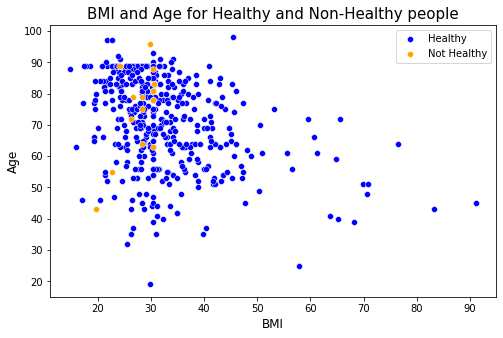

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(x=healthy["BMI"], y=healthy["age"], color="blue", ax=ax, label="Healthy")
sns.scatterplot(x=not_healthy["BMI"], y=not_healthy["age"], color="orange", ax=ax, label="Not Healthy")
ax.set_xlabel("BMI", size=12)
ax.set_ylabel("Age", size=12)
ax.set_title("BMI and Age for Healthy and Non-Healthy people", size=15)
ax.legend()
plt.show()